In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# Explainable AI (XAI)

This notebooks shows how to apply explainable AI to the model outcomes using ``AUCMEDI``.  

It is the goal of explainability (XAI) to show in human-readable format which features of the input where important for the deep-learning network. This might help for debugging, for example if it is shown that the network learned from background-information that are not important (for example different format of the pictures, or marking symbols etc.)

Of course, to apply XAI we first need to train our model. If you know how to do this, you can skip until the XAI part. If you don't, have a look in a corresponding notebook (for explanations) or at the code.

## Downloading the data

In [2]:
cwd = !pwd
datadir = cwd[0] + "/data"

from pathlib import Path

Path(datadir).mkdir(parents=True, exist_ok=True)

#import wget

#print('Beginning file download with wget module')

#url = 'https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip?download=1'
#wget.download(url, datadir)

# unzip the data

#import zipfile
#with zipfile.ZipFile("data/Kather_texture_2016_image_tiles_5000.zip","r") as zip_ref:
#    zip_ref.extractall("data")

from aucmedi.data_processing.io_data import input_interface
ds_loader = input_interface("directory", path_imagedir="data/Kather_texture_2016_image_tiles_5000", path_data=None, training=True, ohe=False)
(samples, class_ohe, nclasses, class_names, image_format) = ds_loader

from aucmedi.sampling.split import sampling_split
train, validation, test = sampling_split(samples, class_ohe, sampling=[0.5, 0.25, 0.25], stratified=True, iterative=False, seed=123)

2022-08-15 11:09:57.549681: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Define the model

In [3]:
from aucmedi.neural_network.model import NeuralNetwork
import tensorflow_addons as tfa

f1Score = tfa.metrics.F1Score(num_classes=nclasses, threshold=0.5)


model = NeuralNetwork(n_labels=nclasses, channels=3, loss="categorical_crossentropy", metrics=["categorical_accuracy", f1Score], activation_output="softmax")

2022-08-15 11:09:59.605000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-15 11:10:00.252606: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22519 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:40:00.0, compute capability: 7.5


## Train the model

In [4]:
from aucmedi.data_processing.data_generator import DataGenerator

train_generator = DataGenerator(samples=train[0], path_imagedir="data/Kather_texture_2016_image_tiles_5000",
                                               resize=model.meta_input, standardize_mode=model.meta_standardize,
                                               labels=train[1], image_format=image_format, batch_size=32, data_aug=None, 
                                               grayscale=False, subfunctions=[], prepare_images=False, 
                                               sample_weights=None, seed=123, workers=1)
val_generator = DataGenerator(samples=validation[0], path_imagedir="data/Kather_texture_2016_image_tiles_5000",
                                             resize=model.meta_input, standardize_mode=model.meta_standardize,
                                             labels=validation[1], image_format=image_format, batch_size=32, data_aug=None, 
                                             grayscale=False, subfunctions=[], prepare_images=False, 
                                             sample_weights=None, seed=123, workers=1)

history = model.train(training_generator=train_generator, validation_generator=val_generator, epochs=20, iterations=None, 
                                         callbacks=None, class_weights=None, transfer_learning=False)

Epoch 1/20


2022-08-15 11:10:02.524985: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-08-15 11:10:03.083006: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


79/79 [==============================] - 15s 150ms/step - loss: 1.6922 - categorical_accuracy: 0.3516 - f1_score: 0.1222 - val_loss: 1.2006 - val_categorical_accuracy: 0.5408 - val_f1_score: 0.2331
Epoch 2/20
79/79 [==============================] - 11s 143ms/step - loss: 1.1218 - categorical_accuracy: 0.5592 - f1_score: 0.3975 - val_loss: 0.9489 - val_categorical_accuracy: 0.6408 - val_f1_score: 0.4467
Epoch 3/20
79/79 [==============================] - 11s 141ms/step - loss: 0.9780 - categorical_accuracy: 0.6240 - f1_score: 0.5020 - val_loss: 0.8207 - val_categorical_accuracy: 0.6928 - val_f1_score: 0.5955
Epoch 4/20
79/79 [==============================] - 12s 156ms/step - loss: 0.8473 - categorical_accuracy: 0.6708 - f1_score: 0.6003 - val_loss: 0.7210 - val_categorical_accuracy: 0.7264 - val_f1_score: 0.6636
Epoch 5/20
79/79 [==============================] - 12s 150ms/step - loss: 0.7726 - categorical_accuracy: 0.7028 - f1_score: 0.6476 - val_loss: 0.6421 - val_categorical_accura

/home/main/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/main/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./plot.fitting_course.validation.png
/home/main/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/main/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


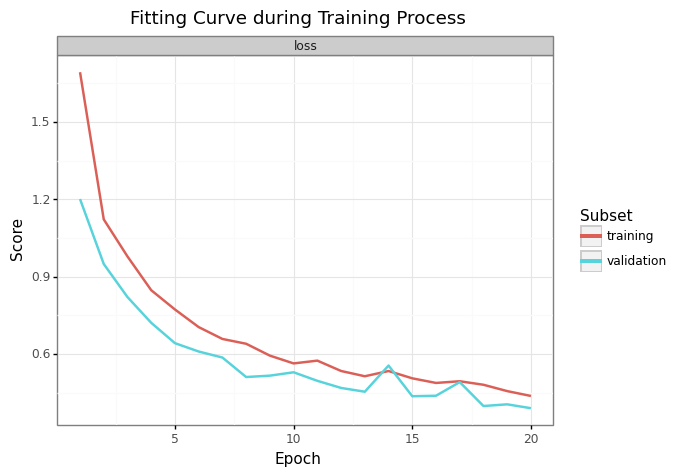

/home/main/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/main/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./plot.fitting_course.accuracy.png
/home/main/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/main/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


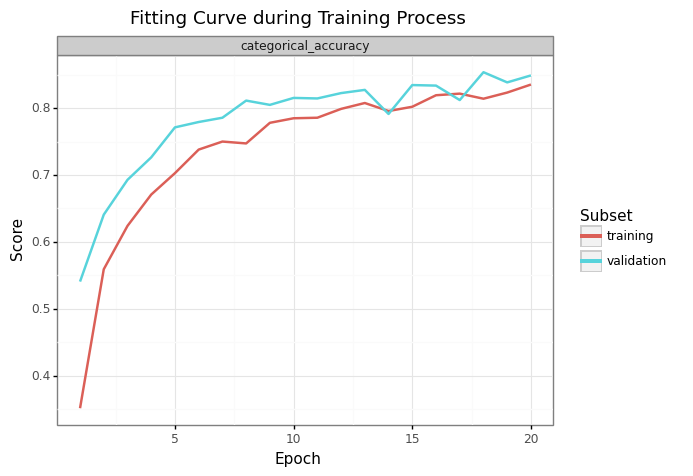

In [5]:
from aucmedi import *
from aucmedi.evaluation.fitting import *

evaluate_fitting(
    train_history = history,
    out_path = "./",
    monitor=["loss"],
    prefix_split=".",
    suffix="validation",
    show=True
)

evaluate_fitting(
    train_history = history,
    out_path = "./",
    monitor=["accuracy"],
    prefix_split=".",
    suffix="accuracy",
    show=True
)

## XAI

Now we will first apply XAI on a single image, just to see how it works in principle. Of course XAI can be applied on all images using a loop.  

The XAI-images are generated with ``AUCMEDI``s ``xai_decoder``. The ``xai_decoder`` takes as inputs a ``DataGenerator``, a ``NeuralNetwork`` model and the ``predictions`` of a model. Furthermore you can specify the XAI-``method``, gradcam is the default. Other methods can be found [here](https://frankkramer-lab.github.io/aucmedi/reference/xai/methods/). With the argument layerName you can specify a layer for the heatmap computation. Default is the last layer. alpha define the transparency for heatmap overlap, when plotted on an image. When an out_path is defined, the XAI-images (heatmaps overlaid over image) are saved here. 

We are going apply the XAI on the first image of the test set, so that's test[0][0].

In [6]:
test[0][0]

'05_DEBRIS/11393_CRC-Prim-HE-08_024.tif_Row_301_Col_451.tif'

In [7]:
from aucmedi.xai.decoder import xai_decoder
path_xai = "xai_gradcam/"

# Create a DataGenerator for data I/O
datagen = DataGenerator([test[0][0]], "data/Kather_texture_2016_image_tiles_5000", labels=None)

# Make some predictions
preds = model.predict(datagen)

# Compute XAI heatmaps via Grad-CAM (resulting heatmaps are stored in out_path)
xai_decoder(datagen, model, preds, method="gradcam", out_path=path_xai)

/home/main/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


1/1 [==============================] - 0s 237ms/step


Here is our image. The gradcam-heatmap highlights which parts were most relevant for the ``NeuralNetwork`` for the classification.

Gradcam works to following: Output-Feature-Maps of the Convolutional-Layers are taken and every channel of this Map is weighted with the gradient of the class that is predicted. Therefore it is shown (in the heatmap) how much the input-image activates the class.

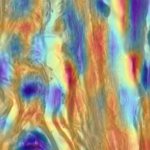

In [9]:
import os

xai_file = test[0][0].replace(os.sep, ".")

from PIL import Image
img = Image.open(path_xai + xai_file)
img.show()

Let's use the same image and apply another XAI method: Lime  

Lime generates Superpixels. The Superpixels are generated by a segmentation of the image into different meaningful parts. This Superpixels are switched on and off and this way pictures are generated were some Superpixels are switched on and others of. The Lime-Algothims calculates the influence of every Superpixel on the prediction of the class. The Superpixel with the greatest influence are shown.

In [10]:
from aucmedi.xai.decoder import xai_decoder

path_xai = "xai_lime/"

# Create a DataGenerator for data I/O
datagen = DataGenerator([test[0][0]], "data/Kather_texture_2016_image_tiles_5000", labels=None)

# Make some predictions
preds = model.predict(datagen)

# Compute XAI heatmaps via LimePro 
xai_decoder(datagen, model, preds, method="LimePro", out_path=path_xai)


1/1 [==============================] - 0s 72ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 112ms/step


  1%|          | 10/1000 [00:00<00:17, 56.18it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 21/1000 [00:00<00:12, 78.71it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 30/1000 [00:00<00:12, 77.68it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 40/1000 [00:00<00:11, 83.43it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 53/1000 [00:00<00:09, 98.34it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 69/1000 [00:00<00:07, 117.03it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 82/1000 [00:00<00:09, 94.92it/s] 

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 93/1000 [00:01<00:10, 88.76it/s]

1/1 [==============================] - 0s 30ms/step


 10%|█         | 103/1000 [00:01<00:09, 90.02it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█▏        | 113/1000 [00:01<00:10, 87.71it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 123/1000 [00:01<00:10, 85.79it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 132/1000 [00:01<00:10, 83.50it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 141/1000 [00:01<00:10, 81.94it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 150/1000 [00:01<00:10, 80.58it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 162/1000 [00:01<00:09, 90.96it/s]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 172/1000 [00:01<00:09, 87.87it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 181/1000 [00:02<00:09, 84.97it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 190/1000 [00:02<00:09, 83.78it/s]

1/1 [==============================] - 0s 31ms/step


 20%|██        | 200/1000 [00:02<00:09, 83.42it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 210/1000 [00:02<00:09, 83.65it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 220/1000 [00:02<00:09, 83.92it/s]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 230/1000 [00:02<00:09, 83.84it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 240/1000 [00:02<00:09, 83.39it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 253/1000 [00:02<00:07, 95.06it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 266/1000 [00:02<00:07, 104.26it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 277/1000 [00:03<00:07, 101.14it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 288/1000 [00:03<00:07, 97.78it/s] 

1/1 [==============================] - 0s 31ms/step


 30%|██▉       | 298/1000 [00:03<00:07, 93.91it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 308/1000 [00:03<00:07, 91.87it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 318/1000 [00:03<00:07, 91.01it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 328/1000 [00:03<00:07, 87.47it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 337/1000 [00:03<00:07, 83.59it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 346/1000 [00:03<00:08, 80.89it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 355/1000 [00:04<00:07, 80.90it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 367/1000 [00:04<00:06, 91.01it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 377/1000 [00:04<00:06, 89.24it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▊      | 387/1000 [00:04<00:06, 88.50it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 396/1000 [00:04<00:07, 86.12it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 405/1000 [00:04<00:06, 85.03it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████▏     | 414/1000 [00:04<00:06, 84.00it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 423/1000 [00:04<00:06, 83.06it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 434/1000 [00:04<00:06, 89.71it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 444/1000 [00:05<00:06, 87.78it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▌     | 453/1000 [00:05<00:06, 85.38it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 462/1000 [00:05<00:06, 83.51it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 471/1000 [00:05<00:06, 83.79it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 486/1000 [00:05<00:05, 101.54it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 497/1000 [00:05<00:04, 102.32it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 508/1000 [00:05<00:05, 97.85it/s] 

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 518/1000 [00:05<00:05, 93.50it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 528/1000 [00:05<00:05, 90.37it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 538/1000 [00:06<00:05, 89.56it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 550/1000 [00:06<00:05, 83.70it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 561/1000 [00:06<00:04, 89.92it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▊    | 575/1000 [00:06<00:04, 102.35it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 590/1000 [00:06<00:04, 98.79it/s] 

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 601/1000 [00:06<00:04, 96.70it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 611/1000 [00:06<00:04, 93.51it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 621/1000 [00:06<00:04, 91.04it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 631/1000 [00:07<00:04, 88.34it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 640/1000 [00:07<00:04, 84.56it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 650/1000 [00:07<00:04, 85.20it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 660/1000 [00:07<00:04, 84.98it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 670/1000 [00:07<00:03, 84.80it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 680/1000 [00:07<00:03, 84.84it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 690/1000 [00:07<00:03, 85.72it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 700/1000 [00:07<00:03, 85.10it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████   | 710/1000 [00:08<00:03, 84.85it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 723/1000 [00:08<00:02, 96.85it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▎  | 737/1000 [00:08<00:02, 108.53it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 750/1000 [00:08<00:02, 97.60it/s] 

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 763/1000 [00:08<00:02, 105.29it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 778/1000 [00:08<00:01, 116.74it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 791/1000 [00:08<00:02, 94.77it/s] 

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 802/1000 [00:08<00:02, 93.10it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 812/1000 [00:09<00:02, 90.11it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 822/1000 [00:09<00:02, 88.81it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 832/1000 [00:09<00:01, 85.76it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 841/1000 [00:09<00:01, 80.17it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 850/1000 [00:09<00:01, 79.82it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 860/1000 [00:09<00:01, 80.28it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 870/1000 [00:09<00:01, 84.99it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 880/1000 [00:09<00:01, 84.71it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 890/1000 [00:09<00:01, 85.38it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 900/1000 [00:10<00:01, 86.12it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 910/1000 [00:10<00:01, 85.40it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 920/1000 [00:10<00:00, 84.84it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 930/1000 [00:10<00:00, 85.29it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 940/1000 [00:10<00:00, 83.86it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 950/1000 [00:10<00:00, 84.67it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 960/1000 [00:10<00:00, 86.26it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 970/1000 [00:10<00:00, 86.25it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 980/1000 [00:11<00:00, 86.17it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 990/1000 [00:11<00:00, 85.97it/s]

1/1 [==============================] - 0s 32ms/step


100%|██████████| 1000/1000 [00:11<00:00, 88.75it/s]


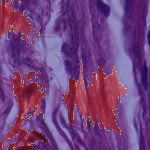

In [11]:
from PIL import Image
import os

xai_file = test[0][0].replace(os.sep, ".")

img = Image.open(path_xai + xai_file)
img.show()

We can also apply XAI on all images at once. Of course, this is a little more computationally expensive.  


In [12]:
from aucmedi.xai.decoder import xai_decoder
from aucmedi.data_processing import data_generator

predict_generator = data_generator.DataGenerator(samples=test[0], path_imagedir="data/Kather_texture_2016_image_tiles_5000",
                                                 resize=model.meta_input, standardize_mode=model.meta_standardize,
                                                 labels=None, image_format=image_format, batch_size=32, data_aug=None, 
                                                 shuffle=False, grayscale=False, subfunctions=[], prepare_images=False, 
                                                 sample_weights=None, seed=123, workers=1)

prediction = model.predict(prediction_generator=predict_generator)

path_xai = "xai_gradcam/"

# Compute XAI heatmaps via Grad-CAM (resulting heatmaps are stored in out_path)
xai_decoder(predict_generator, model, prediction, method="gradcam", out_path=path_xai)

40/40 [==============================] - 4s 100ms/step
